**Diabetes prediction system using Machine learning algorithm**

In [1]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetesdata.csv to diabetesdata.csv


In [3]:
diabetes_dataset = pd.read_csv('/content/diabetesdata.csv')

In [4]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print(diabetes_dataset.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
print(diabetes_dataset.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [7]:
print(np.unique(diabetes_dataset["Outcome"]))

[0 1]


In [8]:
diabetes_dataset.shape

(768, 9)

In [9]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [11]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [12]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.12, random_state=0)

print("Training data")
print(x_train,y_train)
print("Testing data")
print(x_test,y_test)

Training data
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
50             1      103             80             11       82  19.4   
548            1      164             82             43       67  32.8   
572            3      111             58             31       44  29.5   
638            7       97             76             32       91  40.9   
608            0      152             82             39      272  41.5   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
192            7      159             66              0        0  30.4   
629            4       94             65             22        0  24.7   
559           11       85             74              0        0  30.1   
684            5      136             82              0        0   0.0   

     DiabetesPedigreeFunction  Age  
50                      0.491   22  
548                    

In [15]:
print("complete data")
print(np.shape(X))
print("Training data")
print(np.shape(x_train))
print("Testing data")
print(np.shape(x_test))

complete data
(768, 8)
Training data
(675, 8)
Testing data
(93, 8)


In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)
print(x_train_sc)
print(x_train_sc)

[[-0.84116256 -0.5630776   0.55614119 ... -1.60876461  0.07044841
  -0.95699983]
 [-0.84116256  1.37934198  0.65945626 ...  0.09377621 -0.38378971
   1.38834467]
 [-0.25217425 -0.30833405 -0.58032457 ... -0.32550623 -0.1142751
  -0.95699983]
 ...
 [ 0.0423199  -0.84966409 -0.21872183 ... -0.9353716  -0.96824276
  -1.04076214]
 [ 2.10377897 -1.13625058  0.24619598 ... -0.24927306 -0.50794813
   0.13191012]
 [ 0.33681405  0.48773955  0.65945626 ... -4.07363714  0.52165827
   2.97982845]]
[[-0.84116256 -0.5630776   0.55614119 ... -1.60876461  0.07044841
  -0.95699983]
 [-0.84116256  1.37934198  0.65945626 ...  0.09377621 -0.38378971
   1.38834467]
 [-0.25217425 -0.30833405 -0.58032457 ... -0.32550623 -0.1142751
  -0.95699983]
 ...
 [ 0.0423199  -0.84966409 -0.21872183 ... -0.9353716  -0.96824276
  -1.04076214]
 [ 2.10377897 -1.13625058  0.24619598 ... -0.24927306 -0.50794813
   0.13191012]
 [ 0.33681405  0.48773955  0.65945626 ... -4.07363714  0.52165827
   2.97982845]]


total no. of misclassification
18


In [ ]:
from sklearn.linear_model import Perceptron
per = Perceptron(eta0 = 0.001, random_state =0)
per.fit(x_train_sc, y_train)
y_pred = per.predict(x_test_sc)
print('misclassified samples: %d'%(y_test!=y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy:%.2f'%accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 200, random_state =0)
lr.fit(x_train_sc, y_train)
y_pred = lr.predict(x_test_sc)
print('misclassified samples: %d'%(y_test!=y_pred).sum())

print('Accuracy:%.2f'%accuracy_score(y_test,y_pred))

misclassified samples: 27
Accuracy:0.82


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2,
                            metric='minkowski')
knn.fit(x_train_sc, y_train)
y_pred=knn.predict(x_test_sc)
print('misclassified samples: %d'%(y_test!=y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy:%.2f'%accuracy_score(y_test,y_pred))

misclassified samples: 31
Accuracy:0.80


In [29]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', C=1, random_state=0)
classifier.fit(x_train_sc, y_train)
y_pred=classifier.predict(x_test_sc)
print('misclassified samples: %d'%(y_test!=y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy:%.2f'%accuracy_score(y_test,y_pred))

misclassified samples: 12
Accuracy:0.87


In [38]:
train_size=[30,50,60,80,88]
accuracy_PCT=[0.63,0.73,0.73,0.66,0.81]
accuracy_LR=[0.77,0.77,0.78,0.82,0.87]
accuracy_KNN=[0.70,0.75,0.77,0.80,0.83]
accuracy_SVM=[0.78,0.78,0.78,0.82,0.87]
accuracy_DNN=[0.66,0.69,0.72,0.73,0.76]

In [19]:
import matplotlib.pyplot as plt

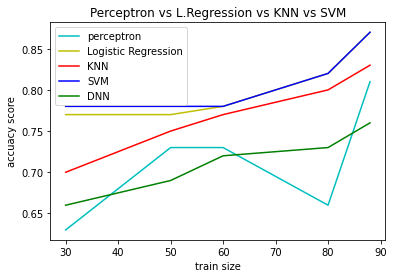

In [39]:
plt.title('Perceptron vs L.Regression vs KNN vs SVM')  
plt.xlabel('train size')  
plt.ylabel('accuacy score')  
plt.plot(train_size,accuracy_PCT,'c',label = 'perceptron')
plt.plot(train_size,accuracy_LR, 'y',label = 'Logistic Regression')
plt.plot(train_size,accuracy_KNN,'r',label = 'KNN')
plt.plot(train_size,accuracy_SVM, 'b',label = 'SVM')
plt.plot(train_size,accuracy_DNN, 'g',label = 'DNN')
plt.legend()
plt.show()

In [ ]:
# accuracy score on the training data
x_train_prediction = classifier.predict(x_train_sc)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print(training_data_accuracy)

In [33]:
#new
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,y_pred)
conf

array([[61,  4],
       [ 8, 20]])

In [ ]:
# accuracy score on the test data
x_test_prediction = classifier.predict(x_test_sc)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print(test_data_accuracy)

0.8709677419354839


In [32]:
x_test_prediction = classifier.predict(x_test_sc)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print(test_data_accuracy)

0.8709677419354839


In [34]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=UserWarning)

Enter no. of pregnancies: 5
Enter level of glucose: 148
Enter blood pressure:73
Enter skin thikness: 35
Enter insulin level: 0
Enter bmi: 33.6
Enter diabetic pedegree fn(): 0.627
Enter age of the patient: 50
[[  5.    148.     73.     35.      0.     33.6     0.627  50.   ]]

[1]

....The person is diabetic....

Diabetic complexity persentage:  54.187408649299265
Covid risk persantage:  52.48655739478526


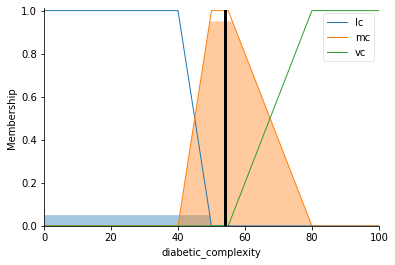

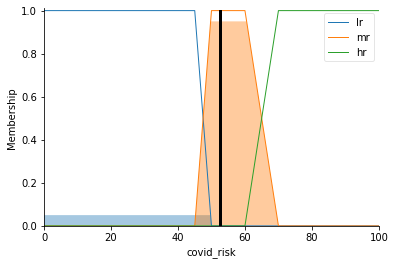

In [36]:
pg=int(input("Enter no. of pregnancies: "))
gl=int(input("Enter level of glucose: "))
bp=int(input("Enter blood pressure:"))
st=int(input("Enter skin thikness: "))
ins=int(input("Enter insulin level: "))
bmi=float(input("Enter bmi: "))
dpf=float(input("Enter diabetic pedegree fn(): "))
age=int(input("Enter age of the patient: "))
input_data = (pg,gl,bp,st,ins,bmi,dpf,age)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

# standardize the input data
std_data = sc.transform(input_data_reshaped)

prediction = classifier.predict(std_data)
print()
print(prediction)
print()
if (prediction[0] == 0):
  print('....The person is not diabetic....')

else:
  print('....The person is diabetic....')
  print()  
  
  import skfuzzy as fuzz
  from skfuzzy import control as ctrl
  import matplotlib.pyplot as plt

  #Input [Antecedent] and output [Consequent] variable P->Q
  bloodpressure=ctrl.Antecedent(np.arange(0,150,1),'bloodpressure')
  bodymassindex=ctrl.Antecedent(np.arange(0,80 ,1),'bodymassindex')
  glucose=ctrl.Antecedent(np.arange(0,200,1),'glucose')
  diabetic_complexity=ctrl.Consequent(np.arange(0,101,1),'diabetic_complexity')
  covid_risk=ctrl.Consequent(np.arange(0,101,1),'covid_risk')

  bloodpressure['vlow']=fuzz.trapmf(bloodpressure.universe,[0,20,25,40])
  bloodpressure['low']=fuzz.trapmf(bloodpressure.universe,[25,40,55,60])
  bloodpressure['med']=fuzz.trapmf(bloodpressure.universe,[55,60,80,90])
  bloodpressure['high']=fuzz.trapmf(bloodpressure.universe,[80,90,115,130])
  bloodpressure['vhigh']=fuzz.trapmf(bloodpressure.universe,[115,130,150,150])
  #bloodpressure.view()
  bodymassindex['l']=fuzz.trapmf(bodymassindex.universe,[0,0,20,30])
  bodymassindex['a']=fuzz.trapmf(bodymassindex.universe,[20,30,50,70])
  bodymassindex['h']=fuzz.trapmf(bodymassindex.universe,[50,70,100,100])
  #bodymassindex.view()
  glucose['ll']=fuzz.trapmf(glucose.universe,[0,0,70,100])
  glucose['al']=fuzz.trapmf(glucose.universe,[70,100,110,150])
  glucose['hl']=fuzz.trapmf(glucose.universe,[110,150,200,200])
  #glucose.view()


  diabetic_complexity['lc']=fuzz.trapmf(diabetic_complexity.universe,[0,0,40,50])
  diabetic_complexity['mc']=fuzz.trapmf(diabetic_complexity.universe,[40,50,55,80])
  diabetic_complexity['vc']=fuzz.trapmf(diabetic_complexity.universe,[55,80,100,100])
  #diabetic_complexity.view()


  covid_risk['lr']=fuzz.trapmf(covid_risk.universe,[0,0,45,50])
  covid_risk['mr']=fuzz.trapmf(covid_risk.universe,[45,50,60,70])
  covid_risk['hr']=fuzz.trapmf(covid_risk.universe,[60,70,100,100])
  #covid_risk.view()
  #covid_risk['hr'].view() # plot only hp of covid_risk

  # Design set rules [Knowledge base]
  rule1a1=ctrl.Rule(bloodpressure['low'] & bodymassindex['l'] & glucose['ll'], diabetic_complexity['vc'])
  rule1b1=ctrl.Rule(bloodpressure['low'] & bodymassindex['l'] & glucose['ll'], covid_risk['hr'])

  rule1a2=ctrl.Rule(bloodpressure['low'] & bodymassindex['l'] & glucose['al'], diabetic_complexity['mc'])
  rule1b2=ctrl.Rule(bloodpressure['low'] & bodymassindex['l'] & glucose['al'], covid_risk['mr'])

  rule1a3=ctrl.Rule(bloodpressure['low'] & bodymassindex['l'] & glucose['hl'], diabetic_complexity['vc'])
  rule1b3=ctrl.Rule(bloodpressure['low'] & bodymassindex['l'] & glucose['hl'], covid_risk['hr'])

  rule1a4=ctrl.Rule(bloodpressure['low'] & bodymassindex['a'] & glucose['ll'], diabetic_complexity['mc'])
  rule1b4=ctrl.Rule(bloodpressure['low'] & bodymassindex['a'] & glucose['ll'], covid_risk['lr'])

  rule1a5=ctrl.Rule(bloodpressure['low'] & bodymassindex['a'] & glucose['al'], diabetic_complexity['lc'])
  rule1b5=ctrl.Rule(bloodpressure['low'] & bodymassindex['a'] & glucose['al'], covid_risk['lr'])

  rule1a6=ctrl.Rule(bloodpressure['low'] & bodymassindex['a'] & glucose['hl'], diabetic_complexity['mc'])
  rule1b6=ctrl.Rule(bloodpressure['low'] & bodymassindex['a'] & glucose['hl'], covid_risk['mr'])

  rule1a7=ctrl.Rule(bloodpressure['low'] & bodymassindex['h'] & glucose['ll'], diabetic_complexity['lc'])
  rule1b7=ctrl.Rule(bloodpressure['low'] & bodymassindex['h'] & glucose['ll'], covid_risk['lr'])

  rule1a8=ctrl.Rule(bloodpressure['low'] & bodymassindex['h'] & glucose['al'], diabetic_complexity['lc'])
  rule1b8=ctrl.Rule(bloodpressure['low'] & bodymassindex['h'] & glucose['al'], covid_risk['lr'])

  rule1a9=ctrl.Rule(bloodpressure['low'] & bodymassindex['h'] & glucose['hl'], diabetic_complexity['vc'])
  rule1b9=ctrl.Rule(bloodpressure['low'] & bodymassindex['h'] & glucose['hl'], covid_risk['hr'])

  rule2a1=ctrl.Rule(bloodpressure['med'] & bodymassindex['l'] & glucose['ll'], diabetic_complexity['mc'])
  rule2b1=ctrl.Rule(bloodpressure['med'] & bodymassindex['l'] & glucose['ll'], covid_risk['mr'])

  rule2a2=ctrl.Rule(bloodpressure['med'] & bodymassindex['l'] & glucose['al'], diabetic_complexity['lc'])
  rule2b2=ctrl.Rule(bloodpressure['med'] & bodymassindex['l'] & glucose['al'], covid_risk['lr'])

  rule2a3=ctrl.Rule(bloodpressure['med'] & bodymassindex['l'] & glucose['hl'], diabetic_complexity['vc'])
  rule2b3=ctrl.Rule(bloodpressure['med'] & bodymassindex['l'] & glucose['hl'], covid_risk['mr'])


  rule2a4=ctrl.Rule(bloodpressure['med'] & bodymassindex['a'] & glucose['ll'], diabetic_complexity['lc'])
  rule2b4=ctrl.Rule(bloodpressure['med'] & bodymassindex['a'] & glucose['ll'], covid_risk['lr'])

  rule2a5=ctrl.Rule(bloodpressure['med'] & bodymassindex['a'] & glucose['al'], diabetic_complexity['lc'])
  rule2b5=ctrl.Rule(bloodpressure['med'] & bodymassindex['a'] & glucose['al'], covid_risk['lr'])

  rule2a6=ctrl.Rule(bloodpressure['med'] & bodymassindex['a'] & glucose['hl'], diabetic_complexity['mc'])
  rule2b6=ctrl.Rule(bloodpressure['med'] & bodymassindex['a'] & glucose['hl'], covid_risk['mr'])


  rule2a7=ctrl.Rule(bloodpressure['med'] & bodymassindex['h'] & glucose['ll'], diabetic_complexity['lc'])
  rule2b7=ctrl.Rule(bloodpressure['med'] & bodymassindex['h'] & glucose['ll'], covid_risk['mr'])

  rule2a8=ctrl.Rule(bloodpressure['med'] & bodymassindex['h'] & glucose['al'], diabetic_complexity['lc'])
  rule2b8=ctrl.Rule(bloodpressure['med'] & bodymassindex['h'] & glucose['al'], covid_risk['mr'])

  rule2a9=ctrl.Rule(bloodpressure['med'] & bodymassindex['h'] & glucose['hl'], diabetic_complexity['vc'])
  rule2b9=ctrl.Rule(bloodpressure['med'] & bodymassindex['h'] & glucose['hl'], covid_risk['hr'])

  rule3a1=ctrl.Rule(bloodpressure['high'] & bodymassindex['l'] & glucose['ll'], diabetic_complexity['mc'])
  rule3b1=ctrl.Rule(bloodpressure['high'] & bodymassindex['l'] & glucose['ll'], covid_risk['lr'])

  rule3a2=ctrl.Rule(bloodpressure['high'] & bodymassindex['l'] & glucose['al'], diabetic_complexity['lc'])
  rule3b2=ctrl.Rule(bloodpressure['high'] & bodymassindex['l'] & glucose['al'], covid_risk['lr'])

  rule3a3=ctrl.Rule(bloodpressure['high'] & bodymassindex['l'] & glucose['hl'], diabetic_complexity['vc'])
  rule3b3=ctrl.Rule(bloodpressure['high'] & bodymassindex['l'] & glucose['hl'], covid_risk['mr'])

  rule3a4=ctrl.Rule(bloodpressure['high'] & bodymassindex['a'] & glucose['ll'], diabetic_complexity['mc'])
  rule3b4=ctrl.Rule(bloodpressure['high'] & bodymassindex['a'] & glucose['ll'], covid_risk['lr'])

  rule3a5=ctrl.Rule(bloodpressure['high'] & bodymassindex['a'] & glucose['al'], diabetic_complexity['lc'])
  rule3b5=ctrl.Rule(bloodpressure['high'] & bodymassindex['a'] & glucose['al'], covid_risk['lr'])

  rule3a6=ctrl.Rule(bloodpressure['high'] & bodymassindex['a'] & glucose['hl'], diabetic_complexity['mc'])
  rule3b6=ctrl.Rule(bloodpressure['high'] & bodymassindex['a'] & glucose['hl'], covid_risk['mr'])

  rule3a7=ctrl.Rule(bloodpressure['high'] & bodymassindex['h'] & glucose['ll'], diabetic_complexity['lc'])
  rule3b7=ctrl.Rule(bloodpressure['high'] & bodymassindex['h'] & glucose['ll'], covid_risk['mr'])

  rule3a8=ctrl.Rule(bloodpressure['high'] & bodymassindex['h'] & glucose['al'], diabetic_complexity['lc'])
  rule3b8=ctrl.Rule(bloodpressure['high'] & bodymassindex['h'] & glucose['al'], covid_risk['lr'])

  rule3a9=ctrl.Rule(bloodpressure['high'] & bodymassindex['h'] & glucose['hl'], diabetic_complexity['vc'])
  rule3b9=ctrl.Rule(bloodpressure['high'] & bodymassindex['h'] & glucose['hl'], covid_risk['hr'])

  rule4a1=ctrl.Rule(bloodpressure['vhigh'] & bodymassindex['l'] & glucose['ll'], diabetic_complexity['mc'])
  rule4b1=ctrl.Rule(bloodpressure['vhigh'] & bodymassindex['l'] & glucose['ll'], covid_risk['hr'])

  rule4a2=ctrl.Rule(bloodpressure['vhigh'] & bodymassindex['l'] & glucose['al'], diabetic_complexity['lc'])
  rule4b2=ctrl.Rule(bloodpressure['vhigh'] & bodymassindex['l'] & glucose['al'], covid_risk['mr'])

  rule4a3=ctrl.Rule(bloodpressure['vhigh'] & bodymassindex['l'] & glucose['hl'], diabetic_complexity['mc'])
  rule4b3=ctrl.Rule(bloodpressure['vhigh'] & bodymassindex['l'] & glucose['hl'], covid_risk['mr'])

  rule4a4=ctrl.Rule(bloodpressure['vhigh'] & bodymassindex['a'] & glucose['ll'], diabetic_complexity['lc'])
  rule4b4=ctrl.Rule(bloodpressure['vhigh'] & bodymassindex['a'] & glucose['ll'], covid_risk['mr'])

  rule4a5=ctrl.Rule(bloodpressure['vhigh'] & bodymassindex['a'] & glucose['al'], diabetic_complexity['lc'])
  rule4b5=ctrl.Rule(bloodpressure['vhigh'] & bodymassindex['a'] & glucose['al'], covid_risk['lr'])

  rule4a6=ctrl.Rule(bloodpressure['vhigh'] & bodymassindex['a'] & glucose['hl'], diabetic_complexity['vc'])
  rule4b6=ctrl.Rule(bloodpressure['vhigh'] & bodymassindex['a'] & glucose['hl'], covid_risk['hr'])

  rule4a7=ctrl.Rule(bloodpressure['vhigh'] & bodymassindex['h'] & glucose['ll'], diabetic_complexity['mc'])
  rule4b7=ctrl.Rule(bloodpressure['vhigh'] & bodymassindex['h'] & glucose['ll'], covid_risk['hr'])

  rule4a8=ctrl.Rule(bloodpressure['vhigh'] & bodymassindex['h'] & glucose['al'], diabetic_complexity['mc'])
  rule4b8=ctrl.Rule(bloodpressure['vhigh'] & bodymassindex['h'] & glucose['al'], covid_risk['mr'])

  rule4a9=ctrl.Rule(bloodpressure['vhigh'] & bodymassindex['h'] & glucose['hl'], diabetic_complexity['vc'])
  rule4b9=ctrl.Rule(bloodpressure['vhigh'] & bodymassindex['h'] & glucose['hl'], covid_risk['hr'])




  # FIS system
  cl_controller=ctrl.ControlSystem([rule1a1,rule1b1,rule1a2,rule1b2,rule1a3,rule1b3,rule1a4,rule1b4,rule1a5,rule1b5,rule1a6,rule1b6,rule1a7,rule1b7,rule1a8,rule1b8,rule1a9,rule1b9,rule2a1,rule2b1,rule2a2,rule2b2,rule2a3,rule2b3,rule2a4,rule2b4,rule2a5,rule2b5,rule2a6,rule2b6,rule2a7,rule2b7,rule2a8,rule2b8,rule2a9,rule2b9,rule3a1,rule3b1,rule3a2,rule3b2,rule3a3,rule3b3,rule3a4,rule3b4,rule3a5,rule3b5,rule3a6,rule3b6,rule3a7,rule3b7,rule3a8,rule3b8,rule3a9,rule3b9,rule4a1,rule4b1,rule4a2,rule4b2,rule4a3,rule4b3,rule4a4,rule4b4,rule4a5,rule4b5,rule4a6,rule4b6,rule4a7,rule4b7,rule4a8,rule4b8,rule4a9,rule4b9])
  clsc=ctrl.ControlSystemSimulation(cl_controller)


  clsc.input['bloodpressure']=bp
  clsc.input['bodymassindex']=bmi
  clsc.input['glucose']=gl
  clsc.compute()
  print("Diabetic complexity persentage: ",clsc.output['diabetic_complexity'])
  print("Covid risk persantage: ",clsc.output['covid_risk'])

  diabetic_complexity.view(sim=clsc)
  covid_risk.view(sim=clsc)



```
`# This is formatted as code`
```

# Thank you!